# Predicting Boston Housing Price

## Introduction

The dataset used in this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
* 16 data points have an 'MDEV' value of 50.0. These data points likely contain missing or censored values and have been removed.
* 1 data point has an 'RM' value of 8.78. This data point can be considered an outlier and has been removed.
* The features 'RM', 'LSTAT', 'PTRATIO', and 'MEDV' are essential. The remaining non-relevant features have been excluded.
* The feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation.

In [7]:
# Import libraries necessary for this project
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('assets\housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


In [9]:
###########################################
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
###########################################

import matplotlib.pyplot as pl
import numpy as np
import sklearn.model_selection as curves
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import ShuffleSplit, train_test_split

def ModelLearning(X, y, clf):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)
    
    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = pl.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        # Create a Decision tree regressor at max_depth = depth
        regressor = clf(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')

        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    pl.show()

def ModelComplexity(X, y, clf):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(clf(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, test_mean + test_std, alpha = 0.15, color = 'g')

    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()


def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = k)

        # Fit the data
        reg = fitter(X_train, y_train)

        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)

        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))
        
    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

def plot_decision_regions(X, y, classifier, resolution=0.02):

    from matplotlib.colors import ListedColormap

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

## Data Exploration

In this section, i will investigate about the Boston housing data. we will need to separate the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.
We will start with the desciptive statistics about the prices.

In [10]:
# TODO: Minimum price of the data
minimum_price = min(prices)

# TODO: Maximum price of the data
maximum_price = max(prices)

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std()

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price: ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price: $438,900.00
Standard deviation of prices: $165,340.28


## Developing a Model

In this second section of the project, I will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model’s performance through the use of these tools and techniques helps to greatly reinforce the confidence in my predictions.

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, I will calculate the coefficient of determination, R2, to quantify my model’s performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how “good” that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

In [11]:
# TODO: Import 'r2_score'

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    #y_true = np.array(y_true)
    #y_predict = np.array(y_predict)
    #y_mean = y_true.mean()
    #tot = sum((y_true - y_mean)**2)
    #res = sum((y_predict - y_true)**2)
    #score = 1 - res/tot
    
    from sklearn.metrics import r2_score
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

**Goodness of Fit**


In [12]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


**Shuffle and Split Data**

In [13]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=0)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


## Analyzing Model Performance
In this part I’ll take a look at several models’ learning and testing performances on various subsets of training data. Additionally, I’ll investigate one particular algorithm with an increasing 'max_depth' parameter on the full training set to observe how model complexity affects performance. Graphing your model’s performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.

Run the code cell below and use these graphs to answer the following question.

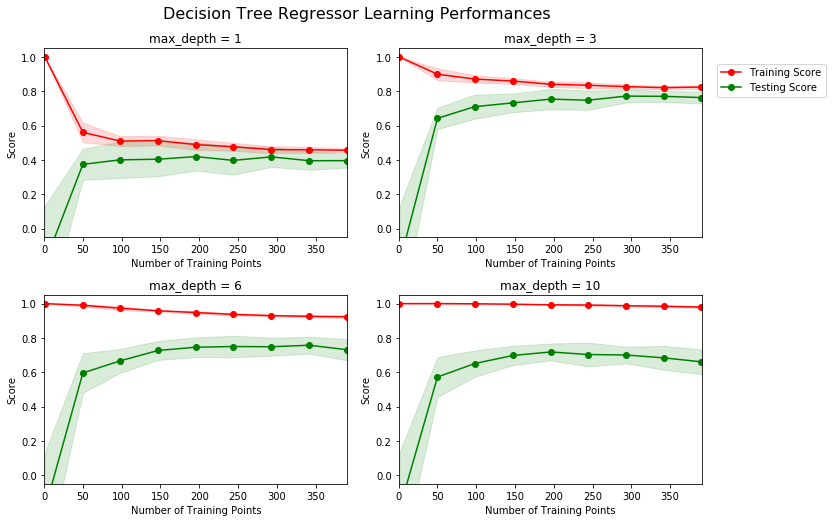

In [14]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices, DecisionTreeRegressor)

From the figures above, we can see that the model has better perfomance while max depth = 3 where it got high scores both on training and testing and the more import point is these two scores are close.
Typically, the score of the training curve converge to some value as more training points are added and so as testing curve. However, the benefit of adding ‘more data’ has its limitation for fixing certain type of problems of models. As we can see scores all converge to certain value and no more decreasing happened as more data added as four pictures above.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

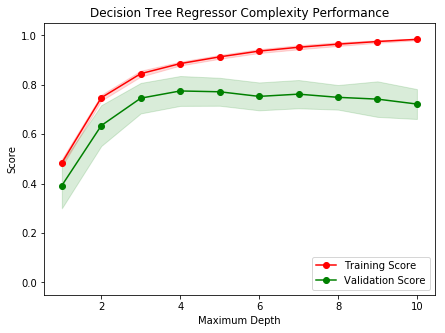

In [15]:
ModelComplexity(X_train, y_train, DecisionTreeRegressor)

When the model is trained with a maximum depth of 1, we can see that it suffer from high bias, and the reason is trivial. And while the maxium depth goes to 10, it suffer from high variance, since the training score is much more higher that validation score.

Since the score represent the interpretation power of model, while the higher score we got, we might think this model can more perfectly fit the data set. However the variance cannot be observed from single line, we need to compare training score line to validation score line to make sure that whether the hypothesis is doing well not only on the original training data subset but also on the validation subset. Obviously, the closer the two lines, the lower the variance.

As a result, I’ll guess depth = 3 or 4 to be the optimal model.

## Evaluating Model Performance

### Grid Search

Grid Search helps a lot when we’re struggling with the model selection problem. As we knew, selecting the algorithm parameters, known as hyperparameters to distinguish them from the parameters that are adjusted within the machine learning algorithm. To migrate this problem, we can use Grid Search to specify a grid of any number of parameters and parameter values to traverse. It will train the classifier for each combination and obtain a cross-validation accuracy to evaluate each one. For example, we can use Grid Search to adjust C and gamma parameters at the same time in SVC, and further we obtain a better combination of C and gamma.

### Cross-Validation
KFold divides all the samples in k groups of samples of equal sizes and is slightly simpler that Grid Search. The prediction function is learned using k - 1 folds, and the fold left out is used for test, i.e. K-Fold Cross Validation is used to validate our model through generating different combinations of the data we already have. For example, if we have 100 samples, we can train our model on the first 90, and test on the last 10. Then we could train on samples 1-80 & 90-100, and test on samples 80-90. Then repeat.
Actually, we need both Grid Search and K-Fold CV, because we not only need to decide the size of train/test subset but also need to determine which combination of parameters of the chosen model would perfectly perform. As a result, it could be go wrong if we do only grid search but cv.

### Fitting a Model

In [18]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.model_selection import GridSearchCV
    from sklearn.metrics import make_scorer
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = GridSearchCV(regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. We can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Optimal Model


In [19]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)
print(reg)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Parameter 'max_depth' is 4 for the optimal model.


So as we can see : Depth = 4 is the best for our data.

**Predicting Selling Prices**

Now we try to imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:


| Feature | Client 1 | Client 2 | Client 3 | | :—: | :—: | :—: | :—: | | Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms | | Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent | | Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 | What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?

In [20]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $324,240.00
Predicted selling price for Client 2's home: $189,123.53
Predicted selling price for Client 3's home: $942,666.67


In [21]:
print(features.describe())

               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000


For these three given features in the model, all of them seem to be reasonable not only on intuition but also on empirical evidence.

For Client 1: The predicting selling price falls in μ±σ. Given lower LSTAT than the average of features.LSTAT and both RM and PTRATIO close to their averages repectively, we might predict that Client 1 should expect a price slightly lower that average. Also, we might find that somehow the LSTAT takes a important role in the model.

For Client 2: The predicting selling price falls in μ±2σ. All of three features are lower than the average, we might predict further lower price for Client 2.

For Client 3: The predicting selling price greater than μ+3σ. All of three features are better than 75%(25% for LSTAT and PTRATIO), so we might predict a highr price for Client 3.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it’s trained on.

In [23]:
PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $324,450.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22
